In [42]:
import os

In [43]:
import pandas as pd
import numpy as np
import fitsio
from astropy.table import Table

In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline
import skimage.io
import cv2

In [45]:
LSLGAdir = os.getenv('LSLGA_DIR')
allgals = os.path.join(LSLGAdir, 'sample', 'large-galaxies-parent.fits')
datafile = os.path.join(LSLGAdir, 'sample', 'CoolGalaxies.csv')

In [46]:
parent = Table(fitsio.read(allgals, ext=1)).to_pandas()
goodones = pd.read_csv(datafile)
galaxies = parent[parent.galaxy.str.decode('utf8').isin(goodones.galaxy)]

In [48]:
forfig = ['NGC7025', 'NGC3239', 'NGC0864']
keep = parent[parent.galaxy.str.decode('utf8').isin(forfig)]

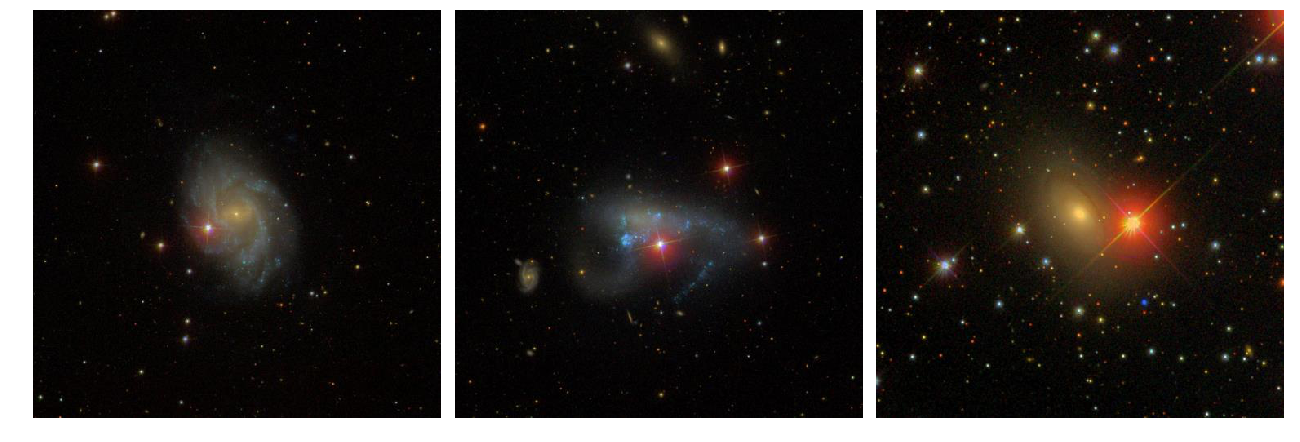

In [52]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

sample = keep

width = 500
height = 500
pixelsize = 0.5 #0.396
plt.figure(figsize=(30, 2.5*len(sample)))
subPlotNum = 1

for idx, gal in sample.iterrows():

    scale = (80*gal.d25)/pixelsize/width
    #scale = (8000*np.degrees(1*(1/3600)))/pixelsize/width
    url = "http://skyservice.pha.jhu.edu/DR14/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url += "&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url += "&height="+str(height)
    
    img = skimage.io.imread(url)
    
    ax = plt.subplot(np.ceil(len(sample)/4), 4, subPlotNum)
    
    subPlotNum += 1  
    plt.axis('off')
    plt.imshow(img)
    
    #circ = Circle((250, 250), 10, facecolor='none', edgecolor='lightgreen', linewidth=2)
    #ax.add_patch(circ)
        
    # show the object identifier (objId) above the image.
    #plt.title(gal.galaxy.decode('utf-8'), fontsize=24)
    
    plt.subplots_adjust(wspace=0.03, hspace=0)